In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from docx import Document


In [2]:
df = pd.read_excel('Data_linguistique/Data.xlsx')
df.head() 

,Eleve_ID,classe,genre,personnages,texte
0,ID_0001,1,0,21,Textes/0001.docx
1,ID_0002,1,0,11,Textes/0002.docx
2,ID_0003,1,0,11,Textes/0003.docx
3,ID_0004,1,0,0,Textes/0004.docx
4,ID_0005,1,0,11,Textes/0005.docx


In [3]:
# Extraction du texte des fichiers .docx et création d'une nouvelle colonne
# 1. Définir le dossier de base

base_folder = "Data_linguistique"

# 2. Fonction pour lire un fichier .docx
def read_docx(file_path):
    try:
        doc = Document(file_path)
        return "\n".join([p.text for p in doc.paragraphs if p.text.strip() != ""])
    except Exception as e:
        print(f"❌ Erreur avec le fichier {file_path} : {e}")
        return None

# 3. Créer une nouvelle colonne avec le texte extrait
df["texte_extrait"] = df["texte"].apply(lambda x: read_docx(os.path.join(base_folder, x)))


In [4]:
df.head() 

,Eleve_ID,classe,genre,personnages,texte,texte_extrait
0,ID_0001,1,0,21,Textes/0001.docx,Deux enfants s’amusent à la mer sur un petit b...
1,ID_0002,1,0,11,Textes/0002.docx,Deux enfants s’amusent à la mer sur un petit b...
2,ID_0003,1,0,11,Textes/0003.docx,Deux enfants s’amusent à la mer sur un petit b...
3,ID_0004,1,0,0,Textes/0004.docx,Deux enfants s’amusent à la mer sur un petit b...
4,ID_0005,1,0,11,Textes/0005.docx,Deux enfants s’amusent à la mer sur un petit b...


In [6]:
# Nettoyage du texte extrait en retirant le passage spécifique du début commun aux rédactions

texte_a_retirer = "Deux enfants s’amusent à la mer sur un petit bateau. Ils sont des explorateurs. " \
"Petit à petit, sans qu’ils s’en aperçoivent, le bateau s’éloigne du rivage poussé par un vent de terre. " \
"Soudain, ils comprennent le danger. Mais ils ont beau ramer, ils ne peuvent plus se rapprocher de la côte à cause du vent."

df["texte_nettoye"] = df["texte_extrait"].apply(
    lambda x: x[len(texte_a_retirer):].lstrip() if x.startswith(texte_a_retirer) else x
)

In [7]:
# Afficher un exemple de texte nettoyé

print(df.loc[1, "texte_nettoye"])

Il est déjà trop tard, Pierre et Maxime sont aux large. Leur mère qui dormait sur la plage commence à les chercher partout. Les deux frères dérivaient pendant deux jours sur leur petit bateau gonflable. Ils commençaient à mourir de faim et de soif. Quand soudain Maxime aperçoit une île. Et les deux garçon ramaire vers l’île quand leur bateau creuva, alors ils nagèrent jusqu’à l’île. Leur mère déséspérer appela la police. Les recherches se poursuivirent mais il étaient introuvable. De l’autre côté de l’Atlantique, les frères avaient trouvé de quoi boire et manger, ils avaient trouver une rivière et des bananiers. Leur bateau creuvé derivait lentemmment vers la côte. Comme ils étaient aller chez les scouts, ils savaient faire un feu alors ils en ont fais un. Ils ont fabriqué des petits piège pour espérer attraper quelque chose. La tombait alors ils se couchère dans un lit de feuille de bananier. Le lendemain matin, un élicoptère vit une grande fumée  blanche alors le pilote compris que c

In [8]:
df["nb_mots"] = df["texte_nettoye"].apply(lambda x: len(str(x).split()))


In [9]:
df.head()

,Eleve_ID,classe,genre,personnages,texte,texte_extrait,texte_nettoye,nb_mots
0,ID_0001,1,0,21,Textes/0001.docx,Deux enfants s’amusent à la mer sur un petit b...,Il est trop tard…\nIls ont chacun espoir de se...,240
1,ID_0002,1,0,11,Textes/0002.docx,Deux enfants s’amusent à la mer sur un petit b...,"Il est déjà trop tard, Pierre et Maxime sont a...",181
2,ID_0003,1,0,11,Textes/0003.docx,Deux enfants s’amusent à la mer sur un petit b...,Il est déjà trop tard pour se rapprocher du ri...,360
3,ID_0004,1,0,0,Textes/0004.docx,Deux enfants s’amusent à la mer sur un petit b...,Ils est déjà trop tard le bateau est trop loin...,152
4,ID_0005,1,0,11,Textes/0005.docx,Deux enfants s’amusent à la mer sur un petit b...,Deux enfants s’amusent à la mer sur un petit b...,212


In [10]:
df.groupby("genre")["nb_mots"].describe()


,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
0,35.0,193.685714,70.837333,59.0,154.50,181.0,237.50,360.0
1,30.0,215.066667,89.277534,65.0,147.25,207.0,280.25,408.0


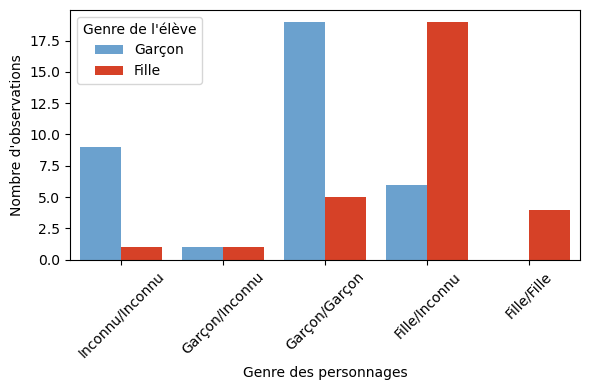

In [11]:
plt.figure(figsize=(6, 4))
custom_palette = ["#5AA3DE","#F32D0A"]

# Ordre voulu pour les catégories
order_labels = [0, 10, 11, 21, 22]
xtick_labels = ["Inconnu/Inconnu", "Garçon/Inconnu", "Garçon/Garçon", "Fille/Inconnu", "Fille/Fille"]

sns.countplot(data=df, 
              x="personnages", 
              hue="genre", 
              palette=custom_palette, 
              order=order_labels)

plt.xlabel("Genre des personnages")
plt.ylabel("Nombre d'observations")

plt.legend(title="Genre de l'élève", labels=["Garçon", "Fille"])  
plt.xticks(ticks=range(len(order_labels)), labels=xtick_labels, rotation=45)

plt.tight_layout()
plt.show()

/var/folders/05/_vxzr9653lg058wd1tp1rdyr0000gn/T/ipykernel_8575/1533531380.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='nb_mots', x='genre', data=df, palette=custom_palette)


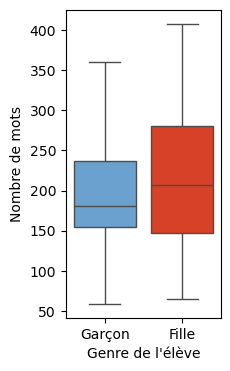

In [12]:
plt.figure(figsize=(2, 4))
custom_palette = ["#5AA3DE","#F32D0A"]
sns.boxplot(y='nb_mots', x='genre', data=df, palette=custom_palette)
plt.ylabel("Nombre de mots")
plt.xlabel("Genre de l'élève")
plt.xticks([0, 1], ["Garçon", "Fille"])
plt.show()

In [14]:
from spellchecker import SpellChecker
import pandas as pd

# initialiser pour le français
spell = SpellChecker(language='fr')  # attention: vocabulaire limité, pas aussi riche que LanguageTool

def correct_text_and_count(text):
    # on tokenise sommairement
    words = text.split()
    misspelled = spell.unknown(words)
    # compter fautes
    n_fautes = len(misspelled)
    # correction mot à mot
    corrected_words = []
    for w in words:
        if w in misspelled:
            corrected_words.append(spell.correction(w) or w)
        else:
            corrected_words.append(w)
    corrected_text = " ".join(corrected_words)
    return corrected_text, n_fautes

# Appliquer sur le df (par ex colonne 'texte_nettoye')
df['texte_corrige_spellchecker'], df['n_fautes_spellchecker'] = zip(*df['texte_nettoye'].astype(str).map(correct_text_and_count))

# Aperçu
df[['texte_nettoye','texte_corrige_spellchecker','n_fautes_spellchecker']].head()

,texte_nettoye,texte_corrige_spellchecker,n_fautes_spellchecker
0,Il est trop tard…\nIls ont chacun espoir de se...,Il est trop tard Ils ont chacun espoir de se r...,38
1,"Il est déjà trop tard, Pierre et Maxime sont a...",Il est déjà trop tard Pierre et Maxime sont au...,31
2,Il est déjà trop tard pour se rapprocher du ri...,Il est déjà trop tard pour se rapprocher du ri...,57
3,Ils est déjà trop tard le bateau est trop loin...,Ils est déjà trop tard le bateau est trop loin...,27
4,Deux enfants s’amusent à la mer sur un petit b...,Deux enfants amusent à la mer sur un petit bat...,33


In [16]:
print(df.loc[1, "texte_corrige_spellchecker"])
print(df.loc[1, "texte_nettoye"])

Il est déjà trop tard Pierre et Maxime sont aux large Leur mère qui dormait sur la plage commence à les chercher partout Les deux frères dérivaient pendant deux jours sur leur petit bateau gonflable Ils commençaient à mourir de faim et de soif Quand soudain Maxime aperçoit une îles Et les deux garçon refaire vers île quand leur bateau creusa alors ils nagèrent jusque l’île. Leur mère désespérer appela la police Les recherches se poursuivirent mais il étaient introuvable De autre côté de l’Atlantique, les frères avaient trouvé de quoi boire et manger ils avaient trouver une rivière et des bananiers Leur bateau creusé dérivait lentement vers la côte Comme ils étaient aller chez les scouts ils savaient faire un feu alors ils en ont fais un Ils ont fabriqué des petits piège pour espérer attraper quelque chose La tombait alors ils se bouchère dans un lit de feuille de bananier Le lendemain matin un hélicoptère vit une grande fumée blanche alors le pilote compris que était les deux enfants e

In [79]:
# Appliquer une lemmatisation puis compter les mots uniques

import spacy

# Charger le modèle français
nlp = spacy.load("fr_core_news_sm")

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if token.is_alpha])  # garder seulement les mots

# Appliquer la lemmatisation sur la colonne
df["texte_lemmatise"] = df["texte_nettoye"].apply(lemmatize_text)

# Compter les mots uniques après lemmatisation
df["nb_mots_uniques"] = df["texte_lemmatise"].apply(lambda x: len(set(x.split())))


In [80]:
# Afficher un exemple de texte lemmatisé

print(df.loc[1, "texte_lemmatise"])

il être déjà trop tard Pierre et Maxime être à large son mère qui dormir sur le plage commence à le chercher partout le deux frère dériver pendant deux jour sur son petit bateau gonflable il commencer à mourir de faim et de soif quand soudain Maxime apercevoir un île et le deux garçon ramaire vers île quand son bateau creuva alors il nager à île son mère déséspérer appela le police le recherche se poursuivre mais il être introuvable de autre côté de Atlantique le frère avoir trouver de quoi boire et manger il avoir trouver un rivière et de bananier son bateau creuver deriver lentemmment vers le côte comme il être aller chez le scout il savoir faire un feu alors il en avoir faire un il avoir fabriquer un petit piège pour espérer attraper quelque chose le tomber alors il se couchère dans un lit de feuille de bananier le lendemain matin un élicoptère voir un grand fumée blanc alors le pilote compris que être le deux enfant et le secouriste arrivèrent et le enfant rentrèrent chez lui


In [81]:
# Calcul du Type-Token Ratio (TTR)
df["TTR"] = df["nb_mots_uniques"] / df["nb_mots"]

In [82]:
# Création d'une variable texte_sans_stopwords en supprimant les stopwords de la variable texte_lemmatise

import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')

stop_words = set(stopwords.words('french'))

def remove_stopwords(text):
    """
    Supprime les stopwords d'un texte déjà lemmatisé.
    """
    return " ".join([word for word in text.split() if word not in stop_words])

# Application sur ta variable texte_lemmatise
df["texte_sans_stopwords"] = df["texte_lemmatise"].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sebastienlebreton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
df.head()

,Eleve_ID,classe,genre,personnages,texte,texte_extrait,texte_nettoye,nb_mots,texte_lemmatise,nb_mots_uniques,TTR,texte_sans_stopwords
0,ID_0001,1,0,21,Textes/0001.docx,Deux enfants s’amusent à la mer sur un petit b...,Il est trop tard…\nIls ont chacun espoir de se...,240,il être trop tard il avoir chacun espoir de se...,120,0.500000,être trop tard avoir chacun espoir rapprocher ...
1,ID_0002,1,0,11,Textes/0002.docx,Deux enfants s’amusent à la mer sur un petit b...,"Il est déjà trop tard, Pierre et Maxime sont a...",181,il être déjà trop tard Pierre et Maxime être à...,101,0.558011,être déjà trop tard Pierre Maxime être large m...
2,ID_0003,1,0,11,Textes/0003.docx,Deux enfants s’amusent à la mer sur un petit b...,Il est déjà trop tard pour se rapprocher du ri...,360,il être déjà trop tard pour se rapprocher de r...,147,0.408333,être déjà trop tard rapprocher rivage alors de...
3,ID_0004,1,0,0,Textes/0004.docx,Deux enfants s’amusent à la mer sur un petit b...,Ils est déjà trop tard le bateau est trop loin...,152,il être déjà trop tard le bateau être trop loi...,82,0.539474,être déjà trop tard bateau être trop loin riva...
4,ID_0005,1,0,11,Textes/0005.docx,Deux enfants s’amusent à la mer sur un petit b...,Deux enfants s’amusent à la mer sur un petit b...,212,Deux enfant amusent à le mer sur un petit bate...,106,0.500000,Deux enfant amusent mer petit bateau être expl...


In [84]:
print(df.groupby("genre")["nb_mots_uniques"].describe())
print(df.groupby("genre")["TTR"].describe())


       count        mean        std   min    25%   50%     75%    max
genre                                                                
0       35.0   95.685714  28.135984  38.0  80.00  91.0  113.00  154.0
1       30.0  103.966667  34.918114  47.0  73.75  95.5  132.25  174.0
       count      mean       std       min       25%       50%       75%  \
genre                                                                      
0       35.0  0.511535  0.063209  0.408088  0.474156  0.500000  0.535362   
1       30.0  0.505782  0.075572  0.394608  0.466495  0.486991  0.537983   

            max  
genre            
0      0.684211  
1      0.723077  


/var/folders/05/_vxzr9653lg058wd1tp1rdyr0000gn/T/ipykernel_29425/593017270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='TTR', x='genre', data=df, palette=custom_palette)


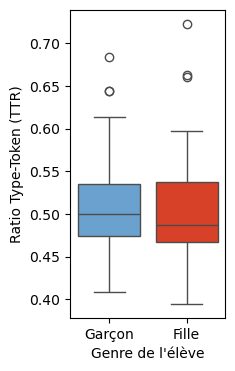

In [104]:
plt.figure(figsize=(2, 4))
custom_palette = ["#5AA3DE","#F32D0A"]
sns.boxplot(y='TTR', x='genre', data=df, palette=custom_palette)
plt.ylabel("Ratio Type-Token (TTR)")
plt.xlabel("Genre de l'élève")
plt.xticks([0, 1], ["Garçon", "Fille"])
plt.show()

In [91]:
# Classer les mots uniques par férquence d'apparition dans chaque genre 
from collections import Counter
# Pour chaque genre
for genre in genres:
    text = " ".join(df[df["genre"] == genre]["texte_sans_stopwords"])
    words = text.split()
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(20)
    print(f"Les mots les plus fréquents pour le genre {genre} : {most_common_words}")


Les mots les plus fréquents pour le genre 0 : [('être', 196), ('avoir', 148), ('enfant', 76), ('bateau', 73), ('deux', 65), ('plus', 59), ('tard', 56), ('voir', 47), ('faire', 45), ('dire', 42), ('île', 41), ('pouvoir', 40), ('déjà', 36), ('tout', 33), ('aller', 30), ('arriver', 29), ('trop', 28), ('trouver', 28), ('petit', 25), ('plage', 25), ('alors', 25), ('parent', 23), ('vent', 20), ('après', 20), ('chercher', 19)]
Les mots les plus fréquents pour le genre 1 : [('être', 178), ('avoir', 126), ('enfant', 81), ('dire', 74), ('aller', 59), ('bateau', 55), ('plus', 52), ('deux', 49), ('tard', 39), ('pouvoir', 39), ('tout', 37), ('île', 36), ('petit', 34), ('arriver', 34), ('parent', 34), ('déjà', 32), ('voir', 32), ('faire', 28), ('appeler', 28), ('vent', 26), ('luire', 23), ('quand', 23), ('alors', 22), ('très', 20), ('trop', 18)]


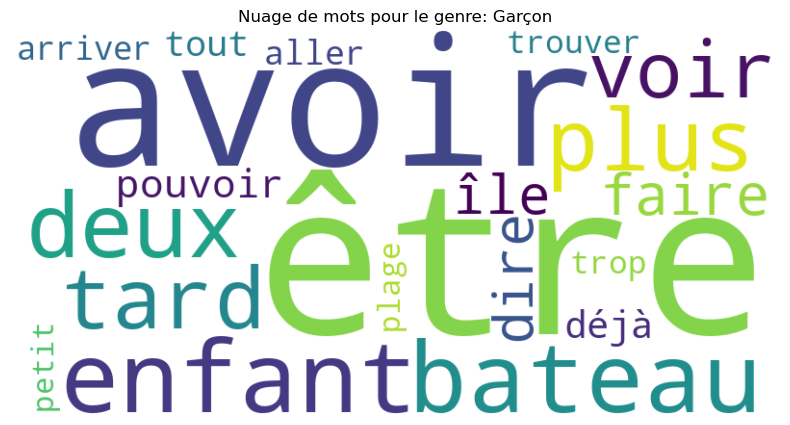

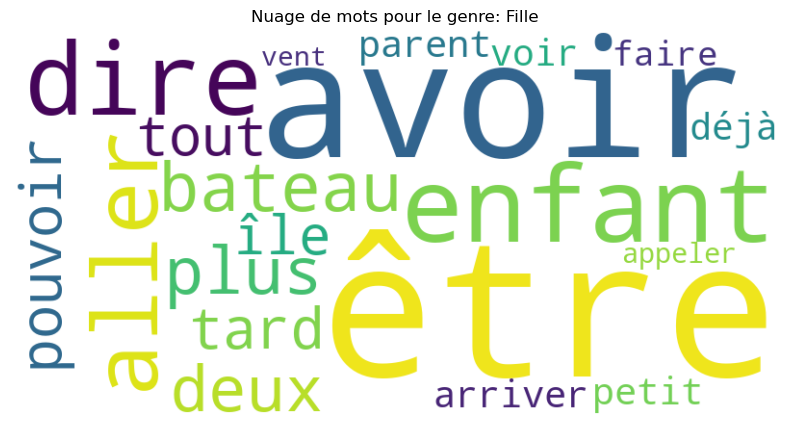

In [93]:
from wordcloud import WordCloud

genre_mapping = {0: "Garçon", 1: "Fille"}

# Générer un WordCloud à partir d'un dictionnaire Counter
for genre_code in genres:
    text = " ".join(df[df["genre"] == genre_code]["texte_sans_stopwords"])
    word_counts = Counter(text.split())

    wc = WordCloud(width=800, height=400, background_color='white', max_words=20)
    wc.generate_from_frequencies(word_counts)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Nuage de mots pour le genre: {genre_mapping[genre_code]}")
    plt.axis('off')
    plt.show()


In [87]:
# Ajouter une colonne avec les 20 mots les plus fréquents dans chaque rédaction

from collections import Counter

def top_20_mots(texte):
    """
    Retourne les 20 mots les plus fréquents dans un texte donné.
    """
    if pd.isna(texte) or texte.strip() == "":
        return []
    
    words = texte.split()  # découpage en mots
    word_counts = Counter(words)  # comptage des occurrences
    return [word for word, count in word_counts.most_common(20)]  # juste la liste des mots

# Ajouter la nouvelle colonne dans le DataFrame
df["top_20_mots"] = df["texte_lemmatise"].apply(top_20_mots)

In [88]:
df.head()

,Eleve_ID,classe,genre,personnages,texte,texte_extrait,texte_nettoye,nb_mots,texte_lemmatise,nb_mots_uniques,TTR,texte_sans_stopwords,top_20_mots
0,ID_0001,1,0,21,Textes/0001.docx,Deux enfants s’amusent à la mer sur un petit b...,Il est trop tard…\nIls ont chacun espoir de se...,240,il être trop tard il avoir chacun espoir de se...,120,0.500000,être trop tard avoir chacun espoir rapprocher ...,"[le, il, de, à, et, un, plus, être, Benjamin, ..."
1,ID_0002,1,0,11,Textes/0002.docx,Deux enfants s’amusent à la mer sur un petit b...,"Il est déjà trop tard, Pierre et Maxime sont a...",181,il être déjà trop tard Pierre et Maxime être à...,101,0.558011,être déjà trop tard Pierre Maxime être large m...,"[le, il, de, un, et, être, son, à, deux, alors..."
2,ID_0003,1,0,11,Textes/0003.docx,Deux enfants s’amusent à la mer sur un petit b...,Il est déjà trop tard pour se rapprocher du ri...,360,il être déjà trop tard pour se rapprocher de r...,147,0.408333,être déjà trop tard rapprocher rivage alors de...,"[le, il, un, et, de, à, enfant, deux, être, se..."
3,ID_0004,1,0,0,Textes/0004.docx,Deux enfants s’amusent à la mer sur un petit b...,Ils est déjà trop tard le bateau est trop loin...,152,il être déjà trop tard le bateau être trop loi...,82,0.539474,être déjà trop tard bateau être trop loin riva...,"[être, le, un, il, enfant, de, qui, dans, île,..."
4,ID_0005,1,0,11,Textes/0005.docx,Deux enfants s’amusent à la mer sur un petit b...,Deux enfants s’amusent à la mer sur un petit b...,212,Deux enfant amusent à le mer sur un petit bate...,106,0.500000,Deux enfant amusent mer petit bateau être expl...,"[le, il, un, de, et, Michel, à, être, avoir, d..."


In [89]:
df.to_csv("Data_linguistique/Data_analyse.csv", index=False)